___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TURBULENCE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TURBULENCE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TURBULENCE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv', index_col = 0)

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling
Take info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.shape

(23486, 10)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [5]:
review = df[['Review Text', 'Recommended IND']]
review.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [6]:
#columns rename
review = review.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
review.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


Text(0.5, 1.0, 'Proportion Target Class')

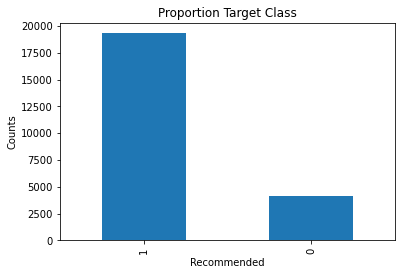

In [7]:
review["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



---
---


### Feature Selection and Rename Column Name

### Missing Value Detection

In [8]:
review.isnull().sum()

Review         845
Recommended      0
dtype: int64

In [9]:
review.dropna(inplace=True)

In [10]:
review.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [11]:
review.shape

(22641, 2)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization

### Noise Removal

### Lexicon Normalization

In [12]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())   #removed the .lower intentionaly to keep NNP s
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [13]:
review['Review'] = review['Review'].apply(cleaning)

In [14]:
review.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


In [15]:
df = review.copy()

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [16]:
positive = review[review.Recommended == 1]
negative = review[review.Recommended == 0]

negative.head()

,Review,Recommended
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0
22,first pullover styling side zipper would purch...,0
25,loved material didnt really look long dress pu...,0


In [17]:
positive.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1


### Collect Words (positive and negative separately)

In [18]:
positive_words =[]

for review in positive.Review:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:200]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi'

In [19]:
negative_words = []

for review in negative.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:200]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half t'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [20]:
from wordcloud import WordCloud

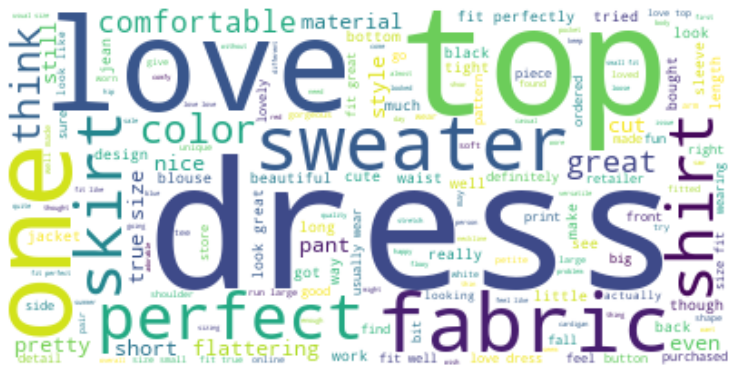

In [21]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

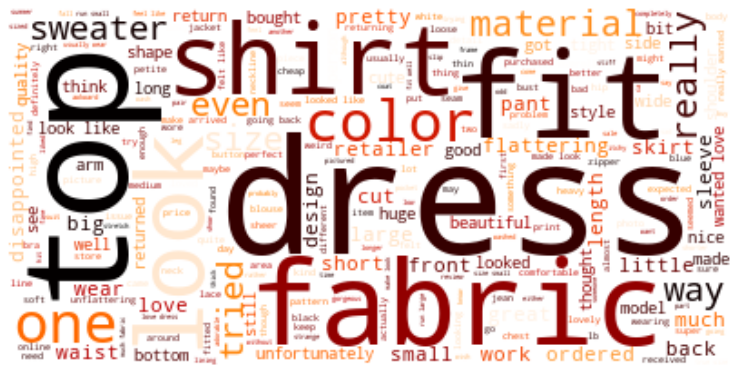

In [22]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [23]:
X = df['Review']
y = df['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [24]:
X_train.head()

11811    top look better hanger looking feminine plaid ...
8171     much question whether love pant several pair p...
22106    legging warm comfortable thick enough wear pan...
7473                     much lower quality robe purchased
19698    arrived white store airy dreamy try epitome ef...
Name: Review, dtype: object

In the next step we create a numerical feature vector for each document:

### Vectorization

In [25]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [26]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [27]:
X_train_count

<18112x10806 sparse matrix of type '<class 'numpy.int64'>'
	with 454855 stored elements in Compressed Sparse Row format>

In [28]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
a=pd.DataFrame(X_train_count.toarray())
a.head()

,0,1,2,3,4,5,6,7,8,9,...,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [30]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer()

In [31]:
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [32]:
tf_idf_word_vectorizer.get_feature_names()[0:5]

['aa', 'aaaaaaamazing', 'aaaaannnnnnd', 'aaaahmazing', 'aaahed']

In [33]:
b=pd.DataFrame(X_train_tf_idf_word.toarray())

In [34]:
b.head()

,0,1,2,3,4,5,6,7,8,9,...,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regression

In [35]:
from sklearn.metrics import f1_score

In [36]:
model = LogisticRegression()
model.fit(X_train_count, y_train)


log_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(log_count_acc)

0.8719387954443338


<AxesSubplot:>

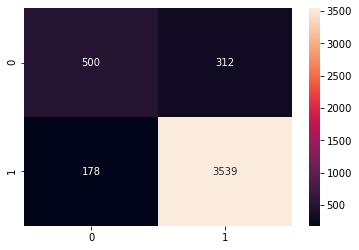

In [37]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [38]:
log_count_f1 = f1_score(y_test, y_pred, average='weighted')
log_count_f1

0.887901180187058

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       812
           1       0.92      0.95      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.89      0.89      0.89      4529



In [40]:
model = LogisticRegression()
model.fit(X_train_tf_idf_word, y_train)


log_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(log_tf_acc)

0.8653128601848052


<AxesSubplot:>

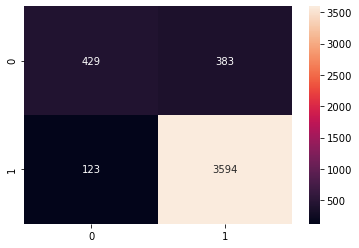

In [41]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [42]:
log_tf_f1 = f1_score(y_test, y_pred, average='weighted')
log_tf_f1

0.8795150613058477

In [43]:
X_train

11811    top look better hanger looking feminine plaid ...
8171     much question whether love pant several pair p...
22106    legging warm comfortable thick enough wear pan...
7473                     much lower quality robe purchased
19698    arrived white store airy dreamy try epitome ef...
                               ...                        
12408    bought grey gorgeous color like long length ar...
22387    love love dress got regular size length petite...
5590     bought one tee washed time luckily hole yet li...
901      excited see jean since came petite size short ...
16401              bought sweater love one favorite season
Name: Review, Length: 18112, dtype: object

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63       812
           1       0.90      0.97      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.84      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529



### Naive Bayes 



In [45]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

nb_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(nb_count_acc)

0.861118599699154


In [46]:
import pickle

pickle.dump(model,open("model_nb","wb"))

<AxesSubplot:>

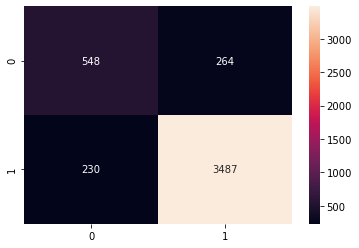

In [47]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [48]:
nb_count_f1 = f1_score(y_test, y_pred, average='weighted')
nb_count_f1

0.8900072356651361

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       812
           1       0.93      0.94      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.82      0.81      0.81      4529
weighted avg       0.89      0.89      0.89      4529



In [50]:
model = MultinomialNB()
model.fit(X_train_tf_idf_word, y_train)


nb_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(nb_tf_acc)

0.8207109925960655


<AxesSubplot:>

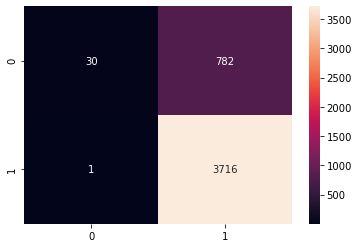

In [51]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [52]:
nb_tf_f1 = f1_score(y_test, y_pred, average='weighted')
nb_tf_f1

0.7552469633303628

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.04      0.07       812
           1       0.83      1.00      0.90      3717

    accuracy                           0.83      4529
   macro avg       0.90      0.52      0.49      4529
weighted avg       0.85      0.83      0.76      4529



### Support Vector Machine (SVM)

In [54]:
model = SVC()
model.fit(X_train_count, y_train)

svm_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(svm_count_acc)



0.8686270487800114


<AxesSubplot:>

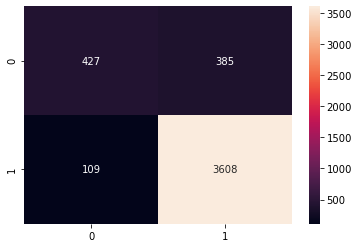

In [55]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [56]:
svm_count_f1 = f1_score(y_test, y_pred, average='weighted')
svm_count_f1

0.8817110450540003

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.63       812
           1       0.90      0.97      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.85      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529



In [58]:
model = SVC()
model.fit(X_train_tf_idf_word, y_train)


svm_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(svm_tf_acc)

0.8679633319658521


<AxesSubplot:>

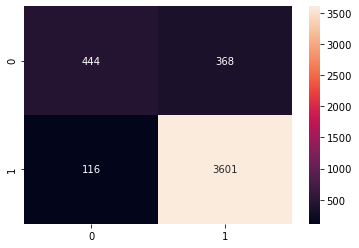

In [59]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [60]:
svm_tf_f1 = f1_score(y_test, y_pred, average='weighted')
svm_tf_f1

0.8850707543911839

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65       812
           1       0.91      0.97      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.85      0.76      0.79      4529
weighted avg       0.89      0.89      0.89      4529



### Random Forest

In [62]:
model = RandomForestClassifier()
model.fit(X_train_count, y_train)

rf_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(rf_count_acc)

0.8419113481412023


<AxesSubplot:>

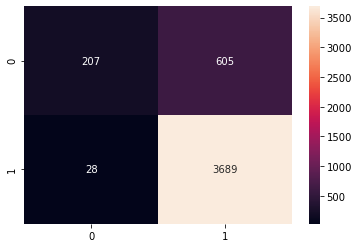

In [63]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [64]:
rf_count_f1 = f1_score(y_test, y_pred, average='weighted')
rf_count_f1

0.8267550412005983

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.25      0.40       812
           1       0.86      0.99      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.87      0.62      0.66      4529
weighted avg       0.86      0.86      0.83      4529



In [66]:
model = RandomForestClassifier()
model.fit(X_train_tf_idf_word, y_train)


rf_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(rf_tf_acc)

0.8383759206079432


<AxesSubplot:>

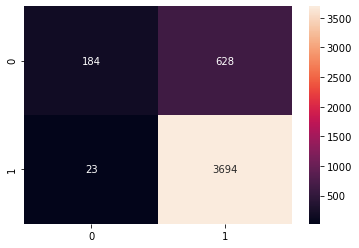

In [67]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [68]:
rf_tf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_tf_f1

0.8189977642288977

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.23      0.36       812
           1       0.85      0.99      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.87      0.61      0.64      4529
weighted avg       0.86      0.86      0.82      4529



### Ada  Boosting

In [70]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_count, y_train)

ada_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(ada_count_acc)

0.8595762761530799


<AxesSubplot:>

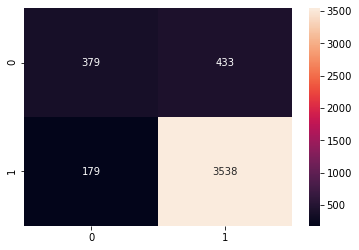

In [71]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [72]:
ada_count_f1 = f1_score(y_test, y_pred, average='weighted')
ada_count_f1

0.8545764925507396

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.47      0.55       812
           1       0.89      0.95      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.79      0.71      0.74      4529
weighted avg       0.85      0.86      0.85      4529



In [74]:
model = AdaBoostClassifier()
model.fit(X_train_tf_idf_word, y_train)


ada_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(ada_tf_acc)

0.8567035886616265


<AxesSubplot:>

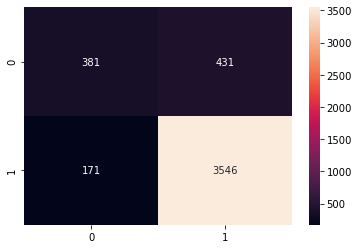

In [75]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [76]:
ada_tf_f1 = f1_score(y_test, y_pred, average='weighted')
ada_tf_f1

0.8566562587077475

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56       812
           1       0.89      0.95      0.92      3717

    accuracy                           0.87      4529
   macro avg       0.79      0.71      0.74      4529
weighted avg       0.86      0.87      0.86      4529



### Compare Models Accuracies and F1 Scores

Text(0.5, 1.0, 'Cv Score of Different Models')

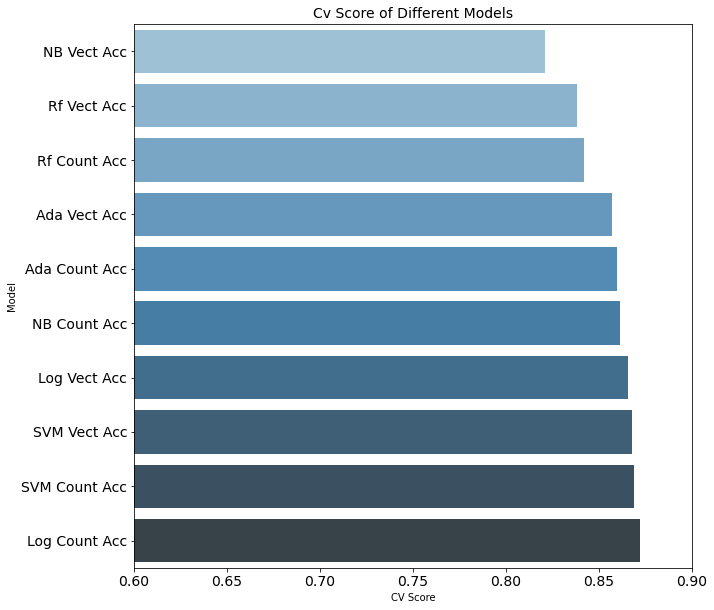

In [78]:
compare = pd.DataFrame({"Model": ["Log Count Acc", "Log Vect Acc", "NB Count Acc", "NB Vect Acc",
                                  "SVM Count Acc","SVM Vect Acc","Ada Count Acc","Ada Vect Acc","Rf Count Acc","Rf Vect Acc"],
                        "CV Score": [log_count_acc, log_tf_acc, nb_count_acc, nb_tf_acc, svm_count_acc, svm_tf_acc,ada_count_acc,ada_tf_acc,rf_count_acc,rf_tf_acc]})

compare = compare.sort_values(by="CV Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="CV Score", y="Model", data=compare, palette="Blues_d")
ax.set_xlim(.60, .90)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Cv Score of Different Models", size=14)

Text(0.5, 1.0, 'F1 Score of Different Models')

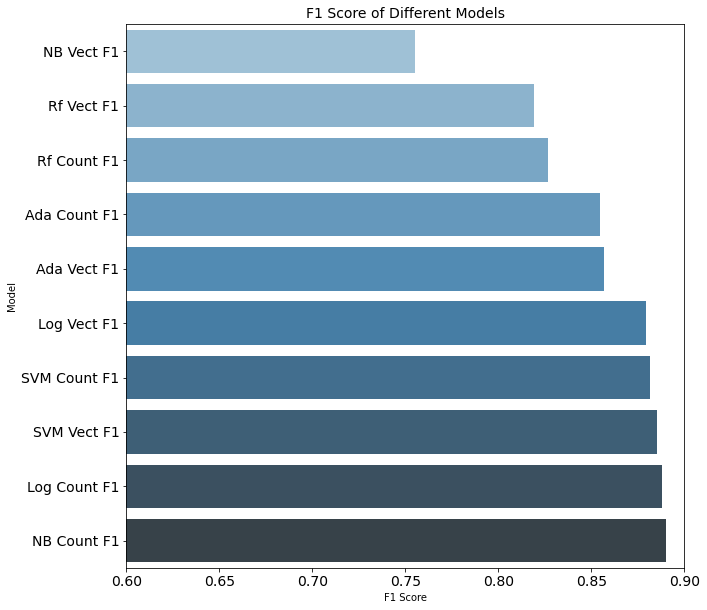

In [79]:
compare = pd.DataFrame({"Model": ["Log Count F1", "Log Vect F1", "NB Count F1", "NB Vect F1",
                                  "SVM Count F1","SVM Vect F1","Ada Count F1","Ada Vect F1","Rf Count F1","Rf Vect F1"],
                        "F1 Score": [log_count_f1, log_tf_f1, nb_count_f1, nb_tf_f1, svm_count_f1, svm_tf_f1,ada_count_f1,ada_tf_f1,rf_count_f1,rf_tf_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
ax.set_xlim(.60, .90)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Different Models", size=14)

In [80]:
nb_model = pickle.load(open("model_nb","rb"))

In [81]:
comment = "I did not like the way this dress fit, the waist was WAY to high and bi, but the chest WAY toooooo small. The length was perfect as were the sleeves."

In [82]:
comment_s = pd.Series(comment)

In [83]:
vect = CountVectorizer()
vect.fit(X_train)


CountVectorizer()

In [84]:
transformed_comment = vect.transform(comment_s)
c = pd.DataFrame(transformed_comment.toarray())
c.head()


,0,1,2,3,4,5,6,7,8,9,...,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
nb_model.predict(transformed_comment)

array([1], dtype=int64)

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___